In [6]:
import jax
import jax.numpy as jnp
import jax_cosmo as jc
sys.path.append('../source/')
from cosmo_jnp import cosmo, pantheon

## Introduce a cosmology

1. Jax cosmo. n_s and sigma8 are dummy values. They should have no effect.
2. Cosmo class from cosmo_jnp module. Data is to be loaded first.

In [88]:
cosmo_jax = jc.Cosmology(h=0.7, Omega_c = 0.25, Omega_b=0.05, w0=-1., wa=0., Omega_k=0, n_s=0.96, sigma8=0.83)
p = pantheon('../data/pantheon.txt', '../data/pantheon_covsys.txt')
zz=jnp.linspace(0.,10,1000)
cosmo_jk = cosmo(0.7, zz)
p.redshift1.min()

DeviceArray(0.00931, dtype=float32)

convert the redhift values to $a$ values

In [70]:
a_panth = jc.utils.z2a(zz)
a_panth.shape

(1000,)

Determing the distance modulus from the luminosity distance

In [71]:
jc.background.angular_diameter_distance?

Signature: jc.background.angular_diameter_distance(cosmo, a)
Docstring:
Angular diameter distance in [Mpc/h] for a given scale factor.

Parameters
----------
a : array_like
    Scale factor

Returns
-------
d_A : ndarray, or float if input scalar

Notes
-----
Angular diameter distance is expressed in terms of the transverse
comoving distance as:

.. math::

    d_A(a) = a f_k(a)
File:      ~/CosmoProjects/differentiablestuff/jax_cosmo/jax_cosmo/background.py
Type:      function


In [72]:
#%%timeit
d_jc = (jc.background.angular_diameter_distance(cosmo_jax, a_panth)/a_panth**2)/cosmo_jax.h
mu_jc = 5*jnp.log10(d_jc) + 25

/home/santiago/anaconda3/envs/diffstuff/lib/python3.10/site-packages/jax/_src/numpy/lax_numpy.py:4459: UserWarning: Explicitly requested dtype <class 'jax.numpy.int64'> requested in astype is not available, and will be truncated to dtype int32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax_internal._check_user_dtype_supported(dtype, "astype")


In [73]:
#%%timeit
cd = {'Omega_m' : 0.30,  'w_0':-1., 'w_1':0.}
d_jk = cosmo_jk.d_L(cosmo_jk.H_z(**cd))
mu_jk=cosmo_jk.dist_mod(cd)

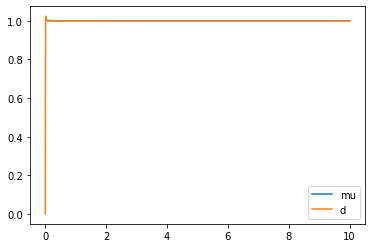

In [105]:
import matplotlib.pyplot as plt
plt.plot(zz, mu_jc/mu_jk, label='mu')
plt.plot(zz, d_jc/d_jk, label='d')
plt.legend()
#plt.xlim(0.00001, 0.00931)
#plt.ylim(-1,1.2)

In [95]:
zz

DeviceArray([ 0.        ,  0.01001001,  0.02002002,  0.03003003,
              0.04004004,  0.05005005,  0.06006006,  0.07007007,
              0.08008008,  0.09009009,  0.1001001 ,  0.1101101 ,
              0.12012012,  0.13013013,  0.14014013,  0.15015015,
              0.16016015,  0.17017016,  0.18018018,  0.19019018,
              0.2002002 ,  0.2102102 ,  0.22022021,  0.23023023,
              0.24024023,  0.25025025,  0.26026025,  0.27027026,
              0.28028026,  0.29029027,  0.3003003 ,  0.3103103 ,
              0.3203203 ,  0.3303303 ,  0.34034032,  0.35035035,
              0.36036035,  0.37037036,  0.38038036,  0.39039037,
              0.4004004 ,  0.4104104 ,  0.4204204 ,  0.4304304 ,
              0.44044042,  0.45045042,  0.46046045,  0.47047046,
              0.48048046,  0.49049047,  0.5005005 ,  0.5105105 ,
              0.5205205 ,  0.5305305 ,  0.5405405 ,  0.5505505 ,
              0.5605605 ,  0.5705705 ,  0.58058053,  0.5905906 ,
              0.6006006 ,

(0.0, 100.0)

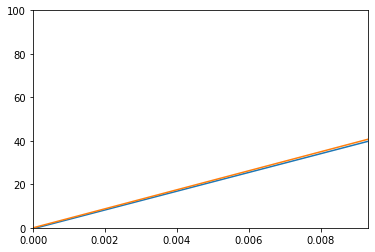

In [89]:
plt.plot(zz,d_jk)
plt.plot(zz,d_jc)
plt.xlim(0,0.00931)
plt.ylim(0,100)

In [97]:
zz[1]

DeviceArray(0.01001001, dtype=float32)

In [100]:
d_jk[0]

DeviceArray(-0.4282653, dtype=float32)

In [101]:
d_jc[0]

DeviceArray(0., dtype=float32)